## **Exploratory Data Analysis**

#### Our research questions are:

   1. Is there a relationship between energy, valence and key?
   2. Is there a relationship between tempo, valence and key?
   3. Is there a relationship between the danceability and valence and the sucess of the song becoming a 'hit'?
   4. Is there a relationship between the Time Signature and the sucess rate of a song becoming a 'hit'?

#### Clean Spotify Data: 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from scripts import project_functions

df = project_functions.read_and_process('../data/raw/spotify_datasheet/dataset-of-00s.csv')
df

,index,Track,Artist,Danceability,Energy,Key,Loudness,Mode,Valence,Tempo,Time Signature,Target
0,613,#1,Nelly,0.692,0.588,7,-6.086,1,0.450,180.027,4,1
1,5669,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,0.759,0.675,9,-5.148,0,0.328,89.642,4,1
2,1700,(B) The Decade Of Statues,Between The Buried And Me,0.159,0.939,9,-6.044,1,0.190,188.078,4,0
3,717,(David Bowie I Love You) Since I Was Six,The Brian Jonestown Massacre,0.201,0.647,10,-6.842,1,0.320,115.609,4,0
4,252,(Do Not Feed The) Oyster,Stephen Malkmus,0.451,0.498,2,-8.535,1,0.266,87.373,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5867,4265,全力少年,Sukima Switch,0.639,0.790,2,-4.156,1,0.733,133.948,4,0
5868,5316,天体観測,BUMP OF CHICKEN,0.366,0.949,1,-3.552,1,0.467,164.979,4,0
5869,1661,焼け野が原,Cocco,0.330,0.934,4,-3.702,1,0.357,159.781,4,0
5870,3041,薔薇と彼女の王子,Heartsrevolution,0.499,0.562,0,-9.957,0,0.375,171.006,4,0


#### Numeric Understanding of the Dataset

In [3]:
df.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
index,5872.0,2935.500000,1695.244722,0.000000,1467.750,2935.5000,4403.25000,5871.000
Danceability,5872.0,0.542931,0.190003,0.058800,0.416,0.5560,0.68100,0.986
Energy,5872.0,0.694511,0.237792,0.000348,0.567,0.7440,0.88500,0.999
Key,5872.0,5.276396,3.564153,0.000000,2.000,5.0000,8.00000,11.000
Loudness,5872.0,-7.449258,5.102543,-47.327000,-8.315,-6.0415,-4.56250,1.137
Mode,5872.0,0.645095,0.478525,0.000000,0.000,1.0000,1.00000,1.000
Valence,5872.0,0.482262,0.254567,0.000000,0.278,0.4860,0.68700,0.982
Tempo,5872.0,121.613018,30.179885,46.755000,96.984,119.9990,141.49525,213.233
Time Signature,5872.0,3.913999,0.404280,0.000000,4.000,4.0000,4.00000,5.000
Target,5872.0,0.500000,0.500043,0.000000,0.000,0.5000,1.00000,1.000


#### Data Visualizations: 

##### 1. Hit Predictor: Energy vs. Valence

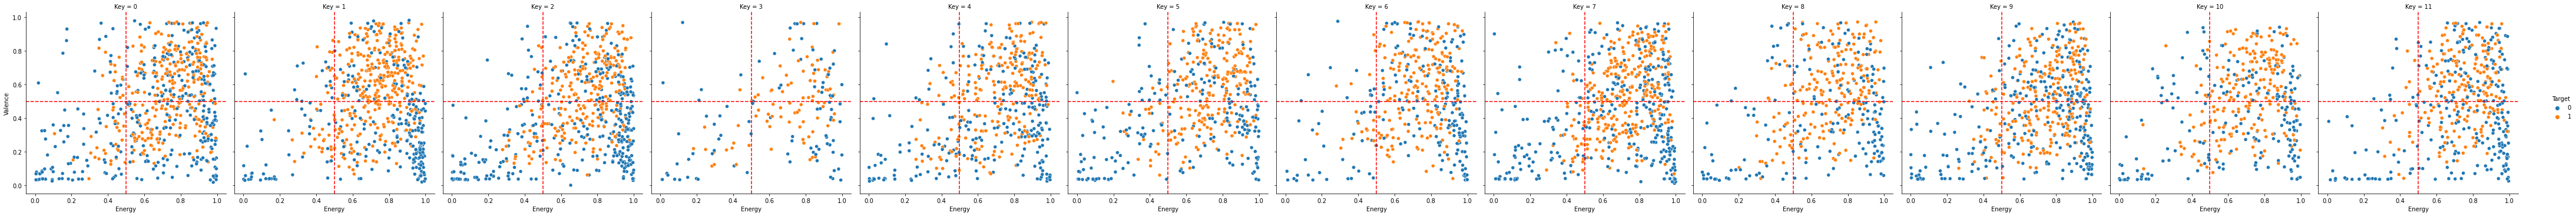

In [4]:
ax2 = sns.relplot(
    x = 'Energy', y = "Valence", data = df, col = 'Key', kind = "scatter", hue = 'Target'
)

ax2.map(plt.axhline, y = 0.5, ls = '--', c = 'red')
ax2.map(plt.axvline, x = 0.5, ls = '--', c = 'red')
ax2.set(xlabel = 'Energy', ylabel = 'Valence')

##### 2. Hit Predictor: Tempo vs. Valence

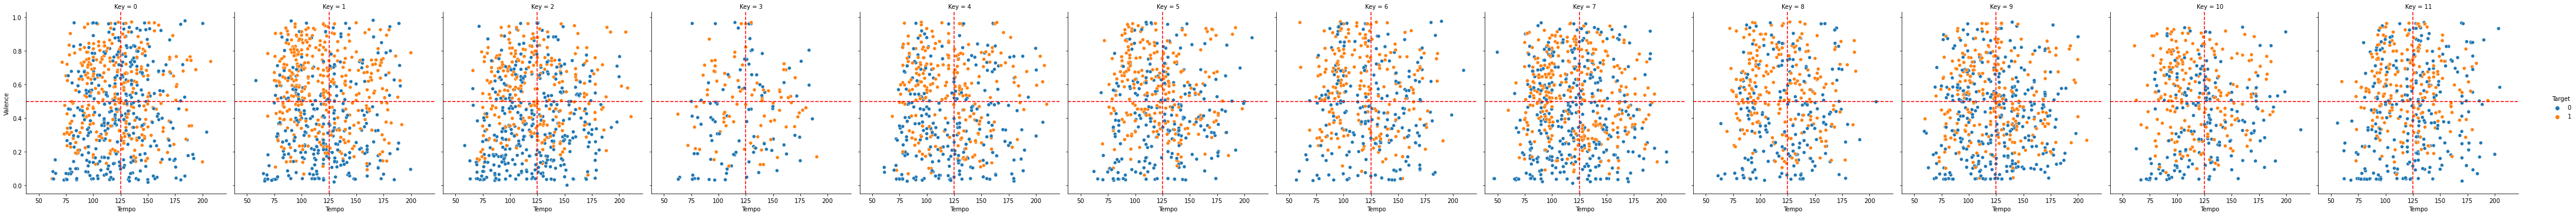

In [5]:
ax3 = sns.relplot(
    x = 'Tempo', y = "Valence", col = 'Key', data = df, kind = "scatter", hue = 'Target'
)
ax3.map(plt.axhline, y = 0.5, ls = '--', c = 'red')
ax3.map(plt.axvline, x = 125, ls = '--', c = 'red')
ax3.set(xlabel = 'Tempo', ylabel = 'Valence')

##### 3. Hit Predictor: The Most Popular Time Signature

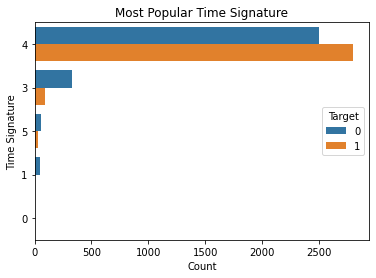

In [6]:
plot= sns.countplot(y="Time Signature", data=df,hue="Target", order=df['Time Signature'].value_counts().index).set(title='Most Popular Time Signature', xlabel='Count')

##### 4. Hit Predictor: Energy vs. Tempo

Text(0.5, 1.0, 'Hit Predictor: Energy and Tempo')

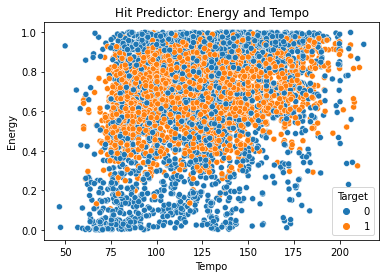

In [9]:
scatter1 = sns.scatterplot(data=df, x="Tempo", y="Energy", hue="Target")

scatter1.set_title('Hit Predictor: Energy and Tempo')

##### 5. Hit Predictor: Danceability vs. Valence

Text(0.5, 1.0, 'Hit Predictor: Danceability and Valence')

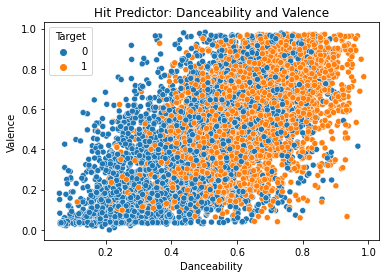

In [8]:
scatter = sns.scatterplot(data=df, x="Danceability", y="Valence", hue="Target")

scatter.set_title('Hit Predictor: Danceability and Valence')

### Explainning our Data 

While exploring our dataset we were able to use .describe get a better understanding of the eight varriables we selected. The eigth varriables gave us a better understanding of the relationships between each variable and how each variable would effected the outcome of weather a song would become a 'Hit'. An important thing to understand about our dataset is that the Target column indicates weather the song is considered a 'Hit or a 'Flop'. Looking at the mean of the Target column it shows that 50% of the songs are 'Hits' and 50% our 'Flops'. Our research is to find the relationship between success rate and energy, danceability, time signature, valence, key and tempo. Thus we made the first and second graph show the relationships between energy, valence and tempo. The first set of graphs are separated into four quadrants which indicate low energy low valence, high energy low valence, low energy high valence and high energy high valence. The first plots show that most of the songs targeted as a 'Hits' are in the high energy area. The key column represents that there is a greater percentage of songs that our targeted as a 'Hit' than those targeted as a 'Flops'. All in all, the first graph concludes that if a song is high energy or with specific key is more likely to become a 'Hit'. The second graph shows the relationship between tempo, valence, key and target. These plots are also separated into four quadrants. The second graph reveals that there are more songs targeted as a 'Hit' when found in low tempo quadrant which is different from our prediction. We predicted that a high tempo song will be more likely to become a 'Hit' as most people like listening to more up beat songs when working out or playing games. However, it is a little hard to find relationship between target and valence through these two graphs because the number of 'Hit' songs do not have that much difference between low valence and high valence quardants. We then made another two graphs to find the relationship between valence, time signature and target. According to the third graph, most frequenent time signature for a song was 4/4 time. However, the time signature not reveal a relationship between the sucess rate of the song become a 'hit' or not. The fourth graph reveals that people prefer a song with moderate energy between 0.4 and 0.8 on a scale of 10, which is a measure of song intensity. This means that death metal and Bach preludes are less likely to become a 'hit' beacuse these types of songs have either to high or to low of engery. The last graph shows the relationship between the Danceability and the Valence (weather the song is precives as happy or sad). The graph reveals there is not a strong relationship between the two variables as there is large varience between the two parameters. However, there is a positive relationship which shows the more danceable the song is the more happy and cheerful the song will be. Most songs that have a higher valence and a higher danceability are classied as a 'Hit'. 

### Conclusion

As analysed above, we found that songs with relatively high energy, high tempo, high valence and high danceability are more likely to become a 'Hit' song. To compare, some keys signatures will also make a song more successful in becoming a 'hit'. However, this analysis might only comply with the Spotify dataset from the 2000s. Thus, a singers still must be creative and bold if they want to create a popular song on Spotify. In our opinion, we think these varibles help the artist target the interest of Spotify veiwers allowing them to predict what most people look for in a 'Hit' song. The graphs shows that the relationship we have stated do not always hold true and there are still songs that may become a 'Hit' without following these trends. In conclusion, the features listed above do help a song become more popular, but the most important thing is the all veiwers have different interests which can cause challenges for artist to happily target to all audiences. 